In [0]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import os
path = '/media/dataset' #1
path_cuadros='/media/dataset_cuadros' #2
path_noencontradas='/media/dataset_noencontradas' #3
path_cortadas='/media/dataset_cortadas' #4


#leer imagenes del directorio
files = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
        for file in f:
          if '.jpeg' or '.jpg' in file:
              files.append(os.path.join(r, file))
print(files)

['/media/dataset/10.jpeg', '/media/dataset/7.jpeg', '/media/dataset/12_B.jpeg', '/media/dataset/3.jpeg', '/media/dataset/8.jpeg', '/media/dataset/11.jpeg', '/media/dataset/6.jpeg', '/media/dataset/1.jpeg', '/media/dataset/4.jpeg', '/media/dataset/2.jpeg', '/media/dataset/5.jpeg', '/media/dataset/9.jpeg']


In [33]:
nombrei = 0
#files=['/media/dataset/10.jpeg']
for imgi in files:
    #nombre del archivo a guardar
    nombrei = nombrei +1
   
    #Abrir Imagen (Lee la imagen en formtado BGR)
    imgBGR = cv2.imread(imgi)
    #Convierte la imagen en RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

    height, width, channels = imgRGB.shape
    print("|---Imagen de entrada----|")
    print ("Alto: ",height," Ancho: ", width,"Canales: ", channels)

    #Copiar imagen del formato RGB para luego convertirla en GRAY
    imgcopyBGR_cortar = np.copy(imgBGR)

    imgcopyBGR_cuadros = np.copy(imgBGR)

    #Nombre y extension
    filename, ext = os.path.splitext(os.path.basename(imgi))

    #Copiar imagen del formato RGB para luego convertirla en GRAY
    imgcopyRGB = np.copy(imgRGB)
    # Se convierte a escala de grises 
    imgGRAY = cv2.cvtColor(imgcopyRGB, cv2.COLOR_RGB2GRAY)

    #--------------------------------------------------------------
    #Detector de Cara
    detector = dlib.cnn_face_detection_model_v1('/content/sample_data/dogHeadDetector.dat')
    dets = detector(imgGRAY, upsample_num_times=1)

    print("Cantidad de caras encontradas en la Imagen->",len(dets))

    if (len(dets)==0):
        print ("Error: No se detectaron caras en la imagen: ", imgi)
        #Guarda imagenes imagenes con cuadros
        filename=(path_noencontradas+'/'+str(nombrei)+'.jpg') 
        print(filename)
        cv2.imwrite(filename, imgBGR) 
    else:

      #Contador de las caras de cada imagen
      nombreii= 0
      #Recorre el número de caras encontradas
      for i, d in enumerate(dets):
          nombreii = nombreii +1
          print("Cara numero ->",i+1)  
          print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

          x, y = d.rect.left(), d.rect.top()
          x2, y2 = d.rect.right(), d.rect.bottom()
          #alto
          h=x2-x
          #ancho
          w=y2-y
          # representa la esquina superior izquierda del rectángulo PT1
          # representa la esquina inferior izquierda del rectángulo PT2
          # Color (255,0,0) en RGB
          # Grosor de línea thickness
          # Se usa el método cv2.rectangle () para dibujar un rectángulo
          cv2.rectangle(imgcopyBGR_cuadros, pt1=(x, y), pt2=(x2, y2), thickness=2, color=(255, 0, 0), lineType=cv2.LINE_AA)

          #Se valida si las coordenadas son negativas para dejar en cero por defecto
          if y<0:
              y=0
          if x<0:
              x=0
          if h<0:
              h=0
          if w<0:
              w=0

          #Corta y guarda imagenes
          filename=(path_cortadas+'/'+str(nombrei)+'_'+str(nombreii)+'.jpg') 
          print(filename)
          #Ejemplo: image[y:y+h, x:x+w]
          cropped_image=imgcopyBGR_cortar[y:(y+h), x:(x+w)]
          cv2.imwrite(filename, cropped_image) 
          
        
      #--------------------------------------------------------------
      print("#------PERRO->",nombrei,"Ruta->", imgi ,"<br>")
      print("#x->",x)
      print("#y->",y)
      print("#h->",h)
      print("#w->",w)

      #Guarda imagenes imagenes con cuadros
      filename=(path_cuadros+'/'+str(nombrei)+'.jpg') 
      print(filename)
      cv2.imwrite(filename, imgcopyBGR_cuadros) 


    

|---Imagen de entrada----|
Alto:  1280  Ancho:  960 Canales:  3
Cantidad de caras encontradas en la Imagen-> 0
Error: No se detectaron caras en la imagen:  /media/dataset/10.jpeg
/media/dataset_noencontradas/1.jpg
|---Imagen de entrada----|
Alto:  622  Ancho:  640 Canales:  3
Cantidad de caras encontradas en la Imagen-> 0
Error: No se detectaron caras en la imagen:  /media/dataset/7.jpeg
/media/dataset_noencontradas/2.jpg
|---Imagen de entrada----|
Alto:  250  Ancho:  333 Canales:  3
Cantidad de caras encontradas en la Imagen-> 0
Error: No se detectaron caras en la imagen:  /media/dataset/12_B.jpeg
/media/dataset_noencontradas/3.jpg
|---Imagen de entrada----|
Alto:  1280  Ancho:  960 Canales:  3
Cantidad de caras encontradas en la Imagen-> 1
Cara numero -> 1
Detection 0: Left: 72 Top: 174 Right: 802 Bottom: 904 Confidence: 1.0020349025726318
/media/dataset_cortadas/4_1.jpg
#------PERRO-> 4 Ruta-> /media/dataset/3.jpeg <br>
#x-> 72
#y-> 174
#h-> 730
#w-> 730
/media/dataset_cuadros/4.jpg

['/media/dataset_cortadas/6_1.jpg', '/media/dataset_cortadas/2_1.jpg', '/media/dataset_cortadas/10_1.jpg', '/media/dataset_cortadas/12_1.jpg', '/media/dataset_cortadas/4_1.jpg', '/media/dataset_cortadas/9_2.jpg', '/media/dataset_cortadas/8_1.jpg', '/media/dataset_cortadas/11_1.jpg', '/media/dataset_cortadas/1_1.jpg', '/media/dataset_cortadas/9_1.jpg', '/media/dataset_cortadas/11_2.jpg', '/media/dataset_cortadas/3_1.jpg', '/media/dataset_cortadas/12_2.jpg', '/media/dataset_cortadas/5_2.jpg', '/media/dataset_cortadas/4_2.jpg', '/media/dataset_cortadas/7_1.jpg', '/media/dataset_cortadas/3_2.jpg', '/media/dataset_cortadas/5_1.jpg']
/media/dataset_redimensionadas/1.jpg
/media/dataset_redimensionadas/2.jpg
/media/dataset_redimensionadas/3.jpg
/media/dataset_redimensionadas/4.jpg
/media/dataset_redimensionadas/5.jpg
/media/dataset_redimensionadas/6.jpg
/media/dataset_redimensionadas/7.jpg
/media/dataset_redimensionadas/8.jpg
/media/dataset_redimensionadas/9.jpg
/media/dataset_redimensionadas/

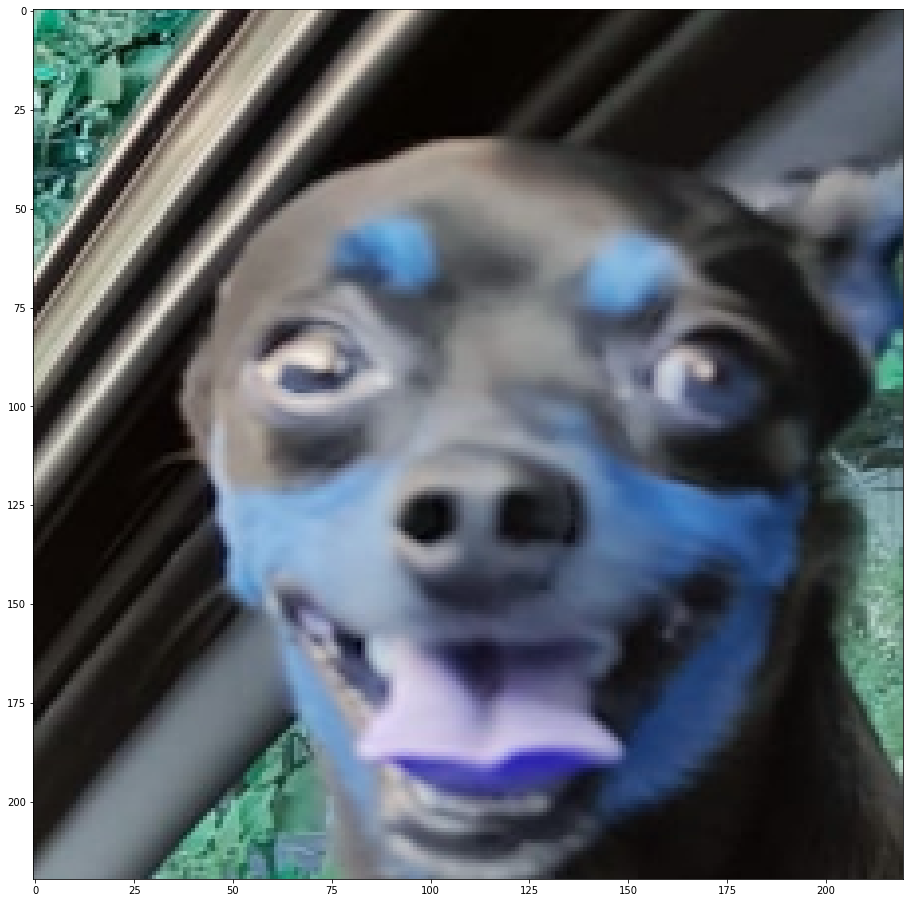

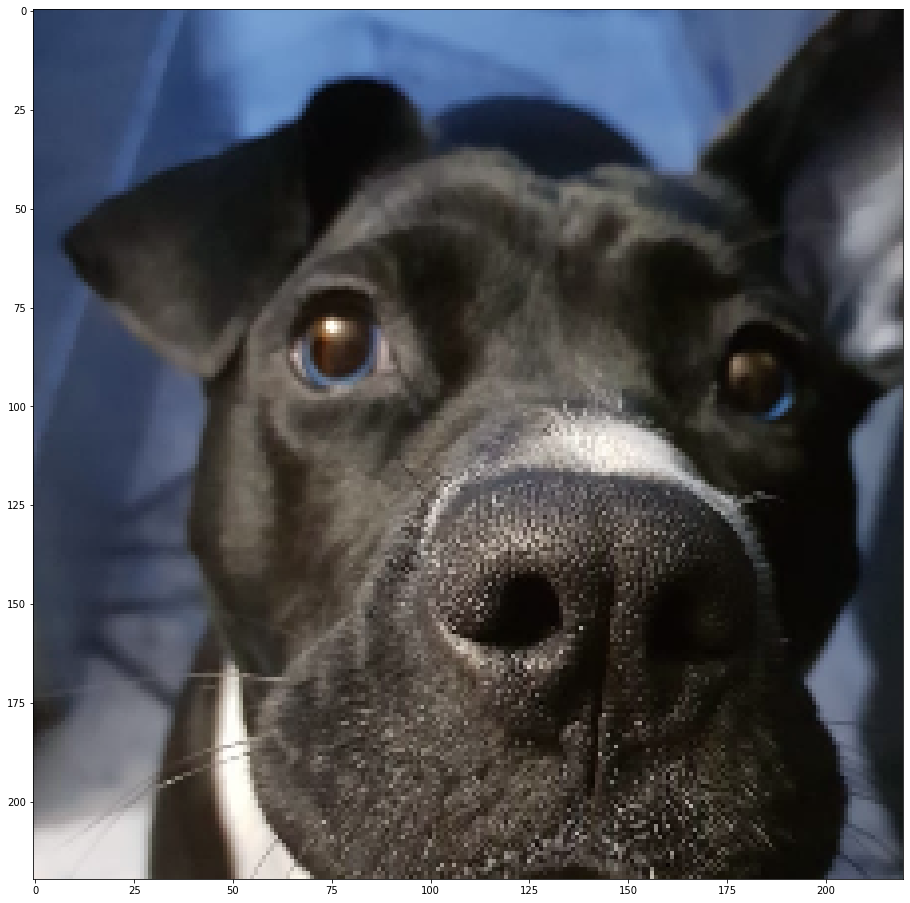

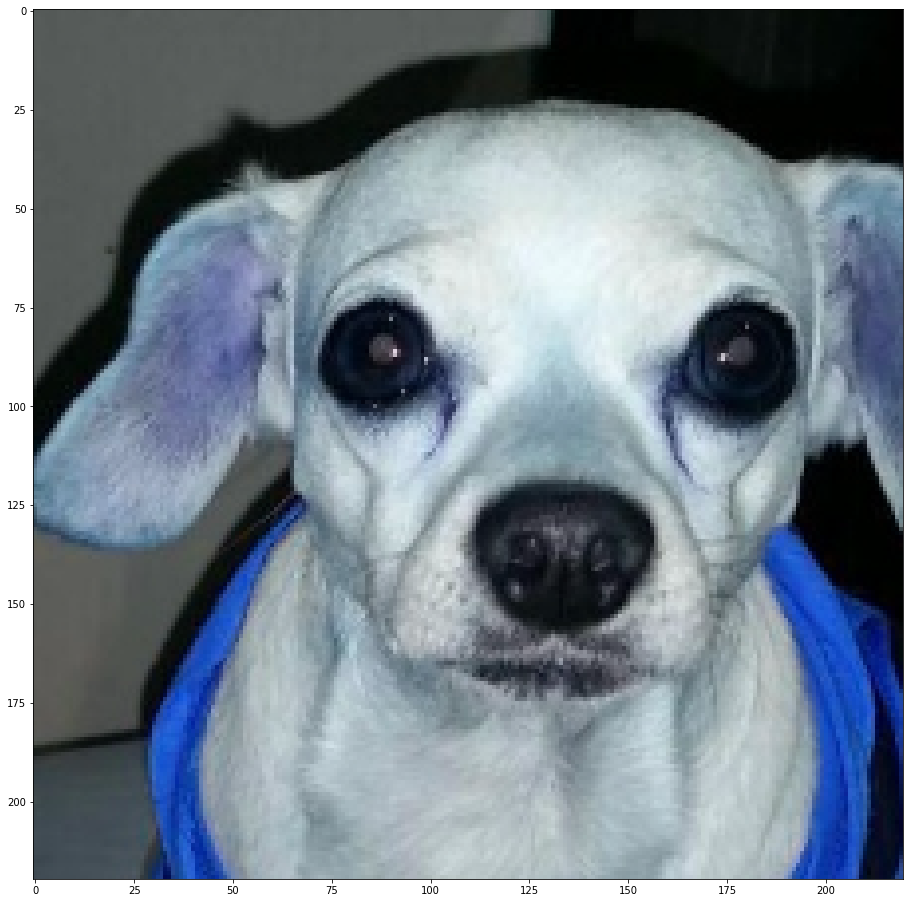

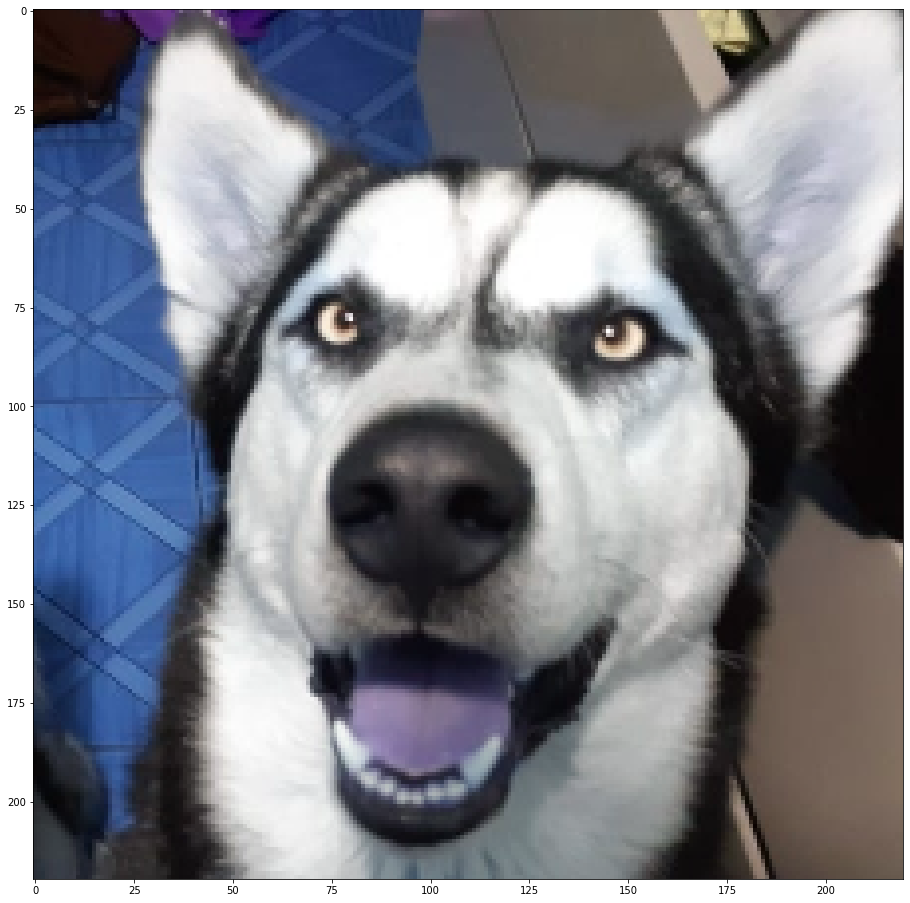

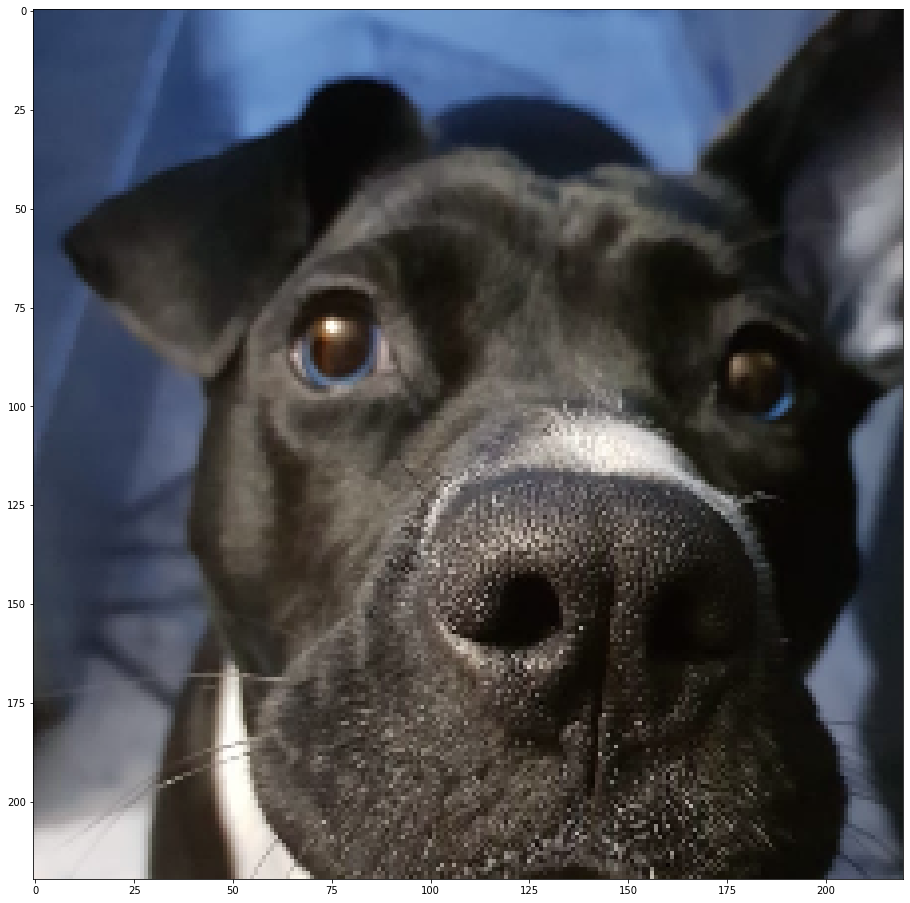

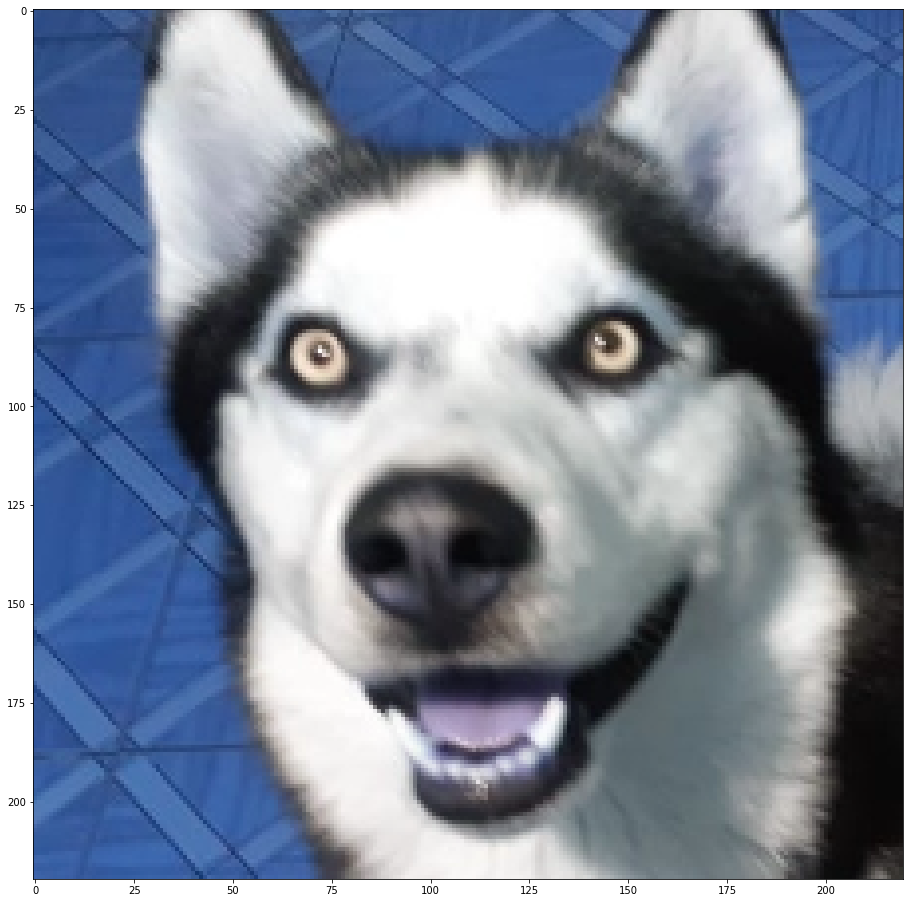

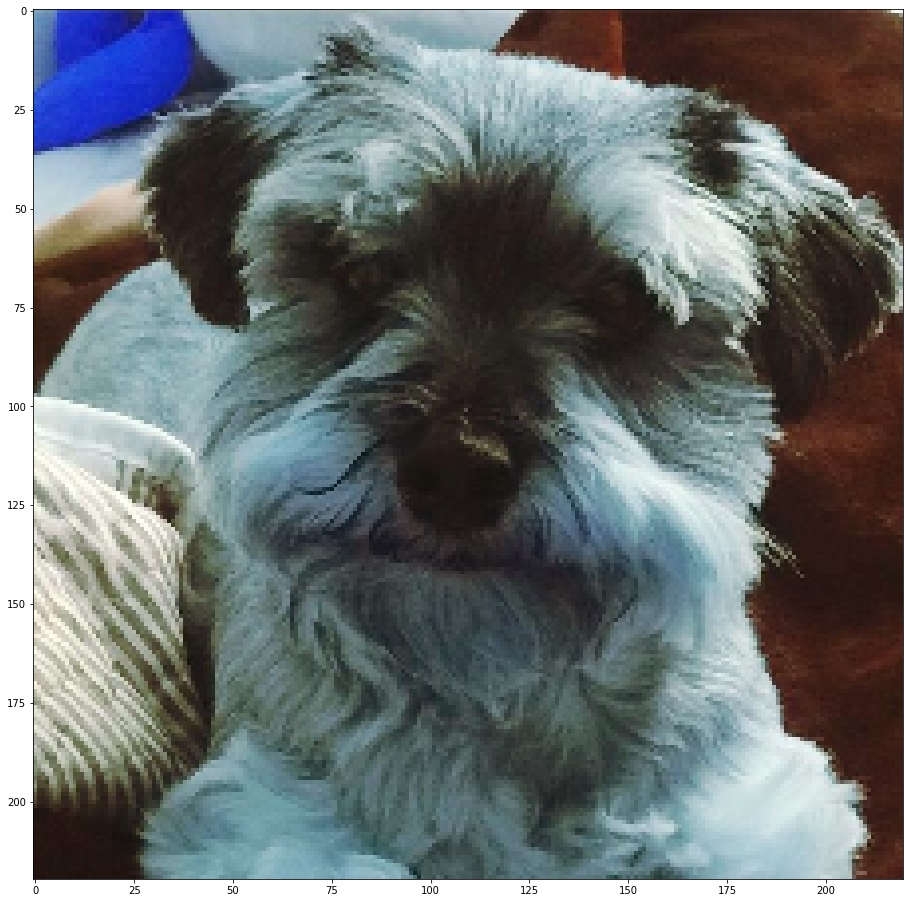

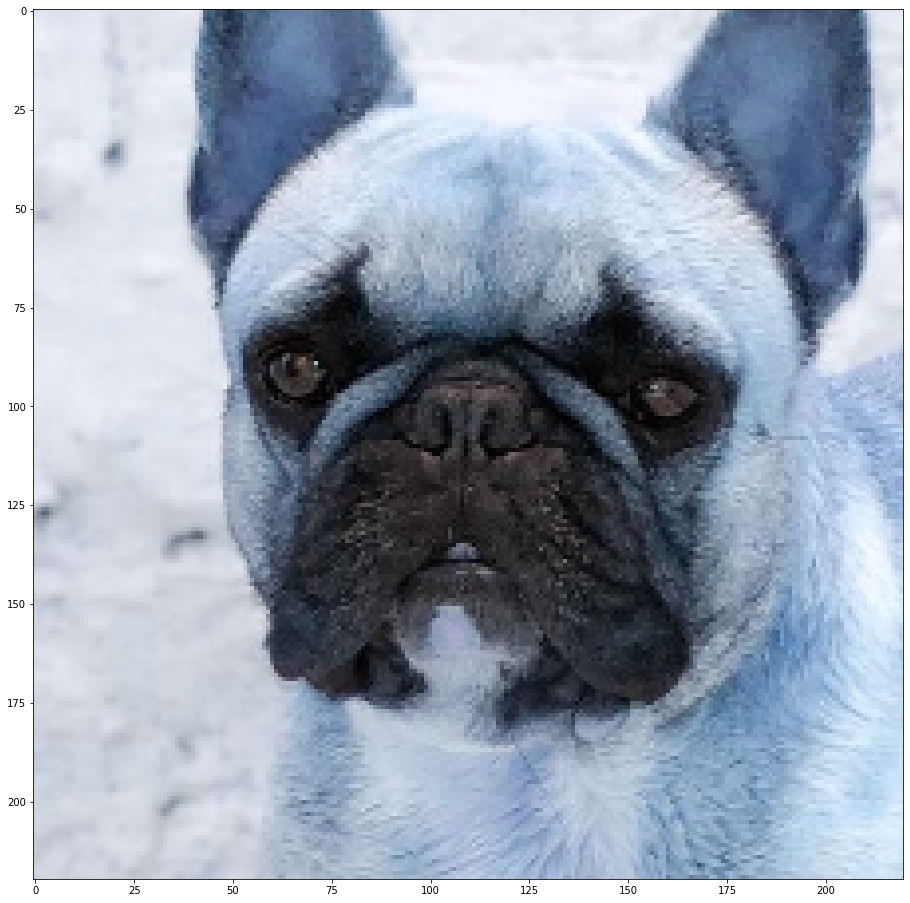

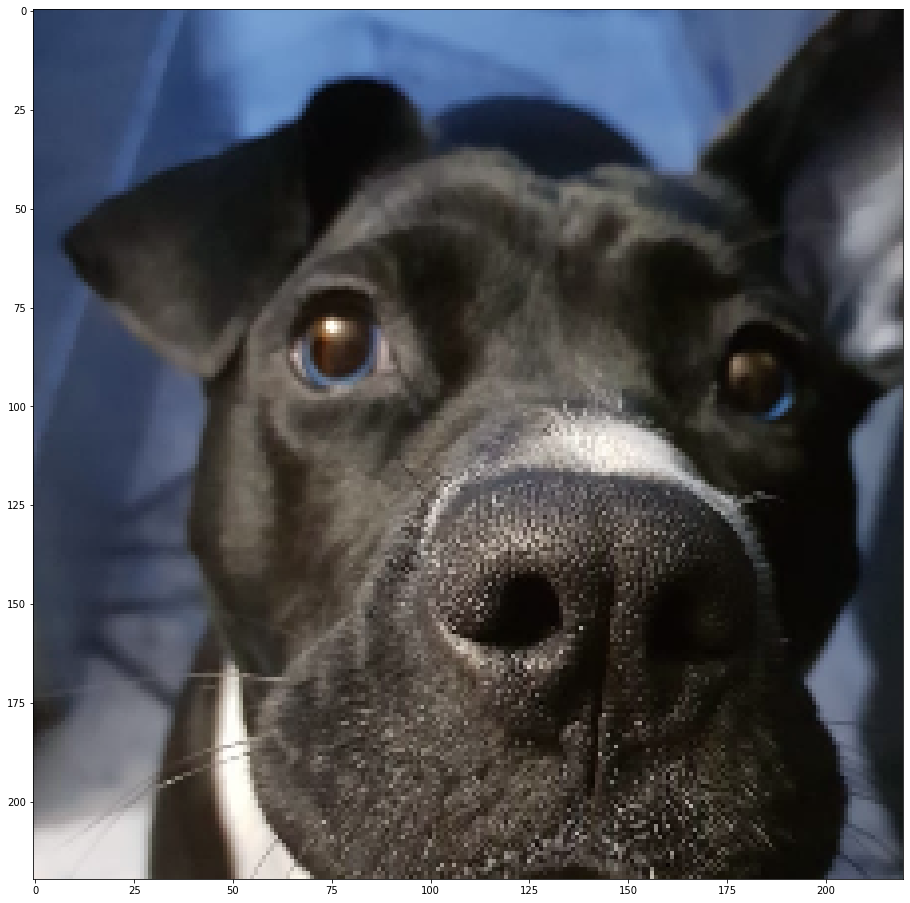

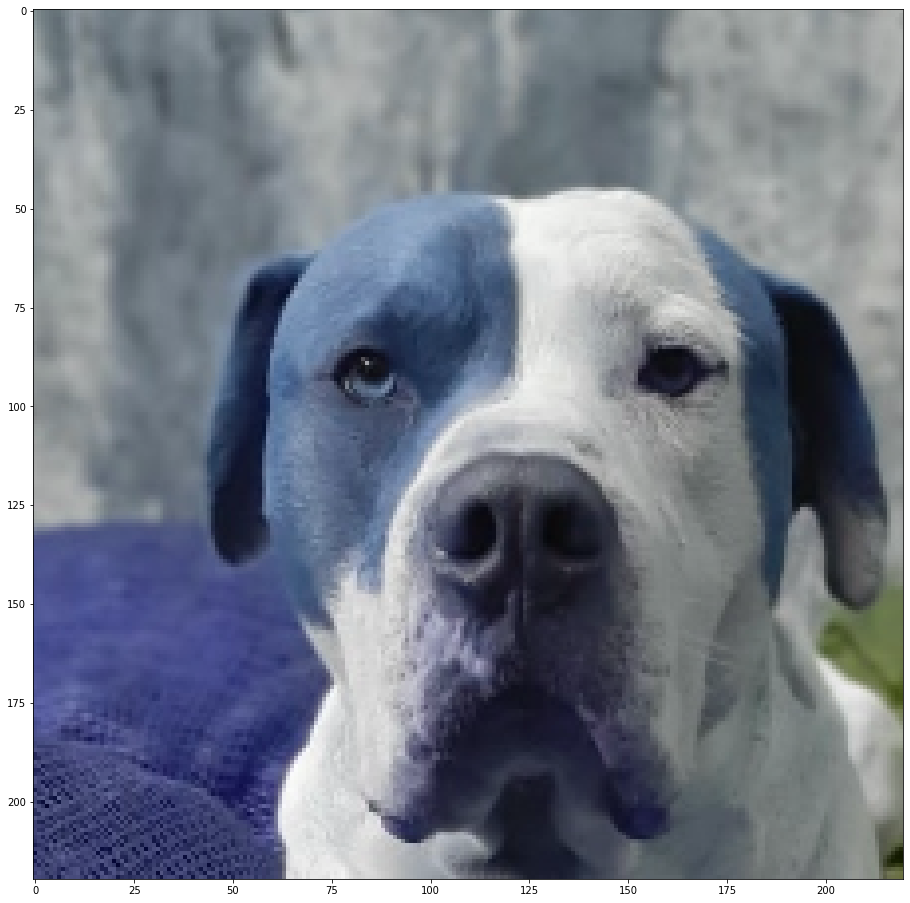

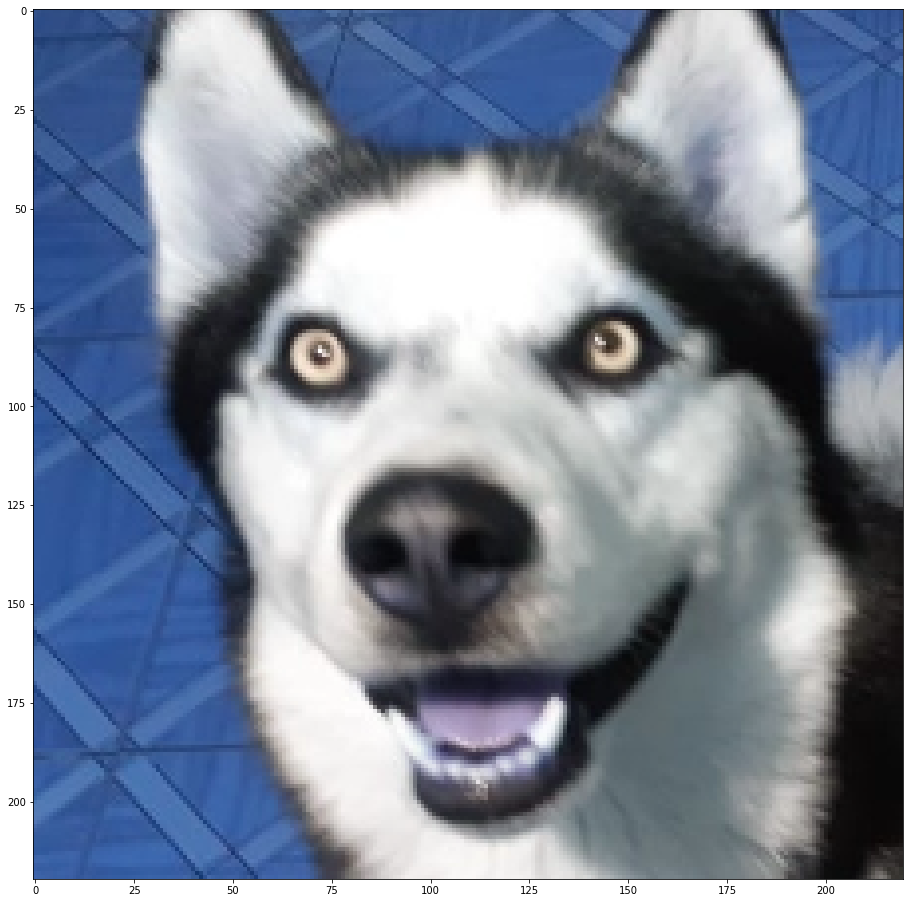

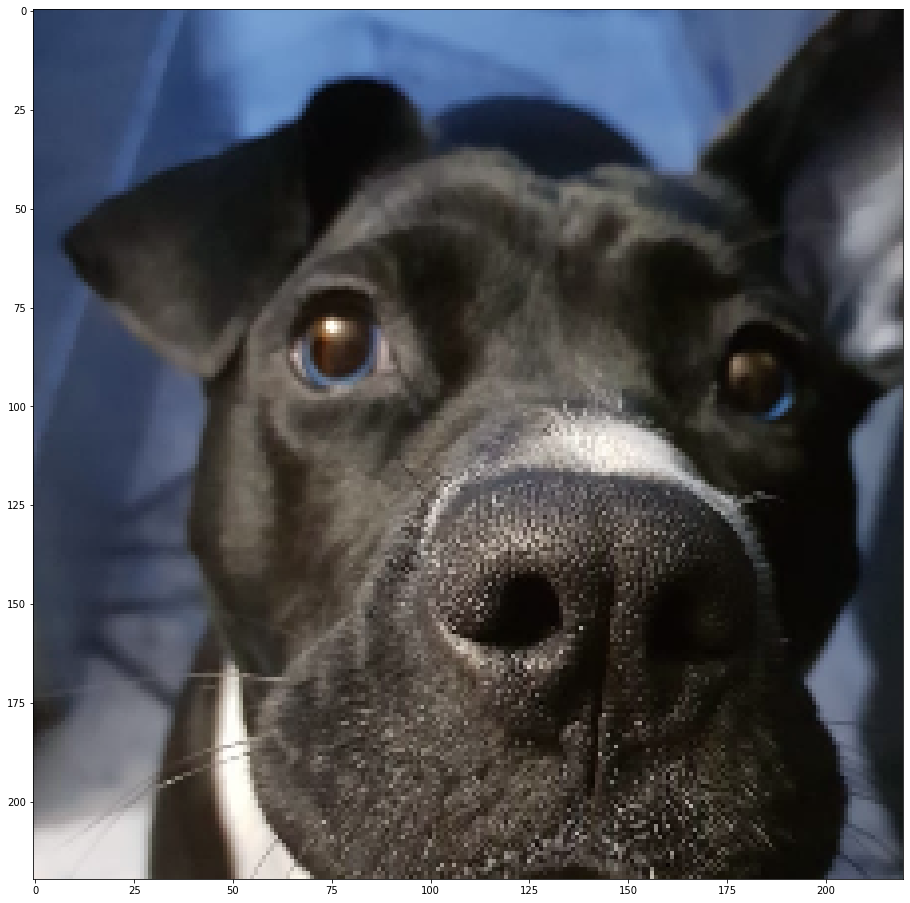

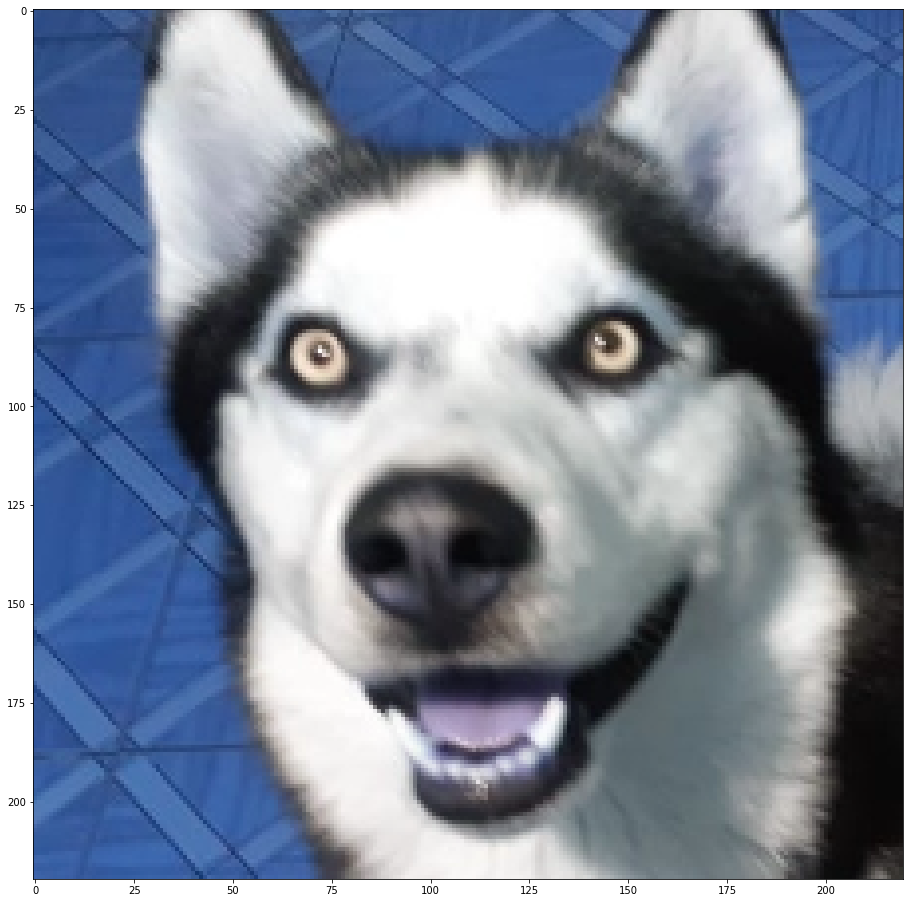

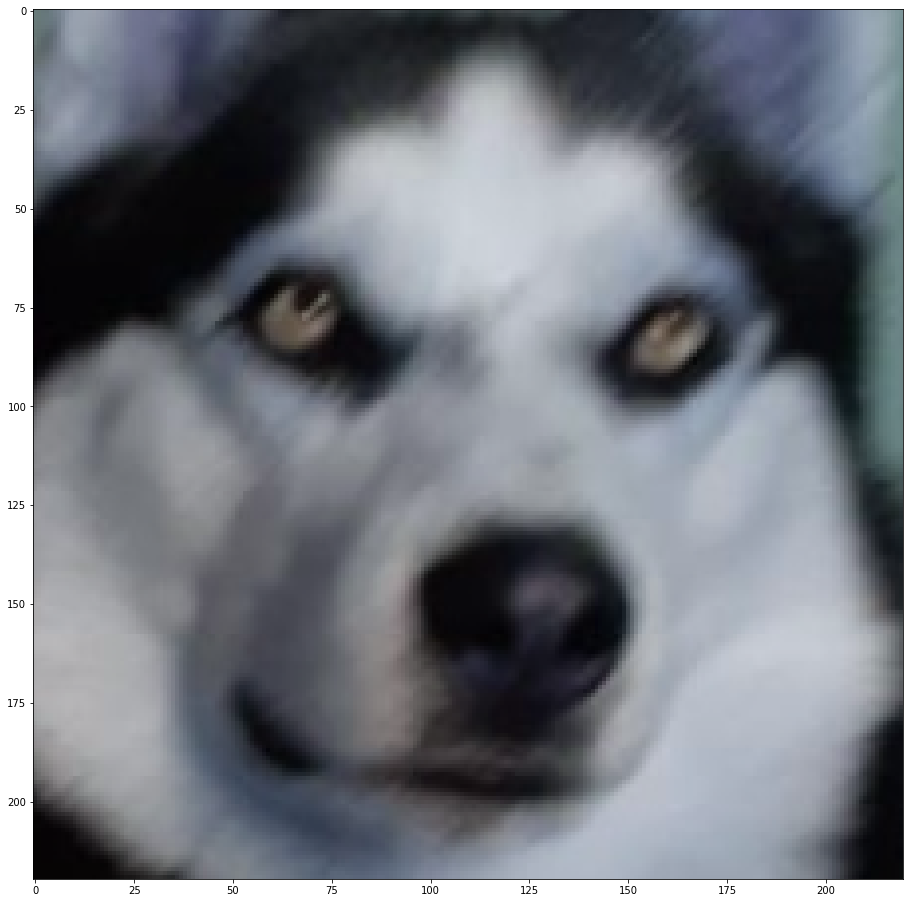

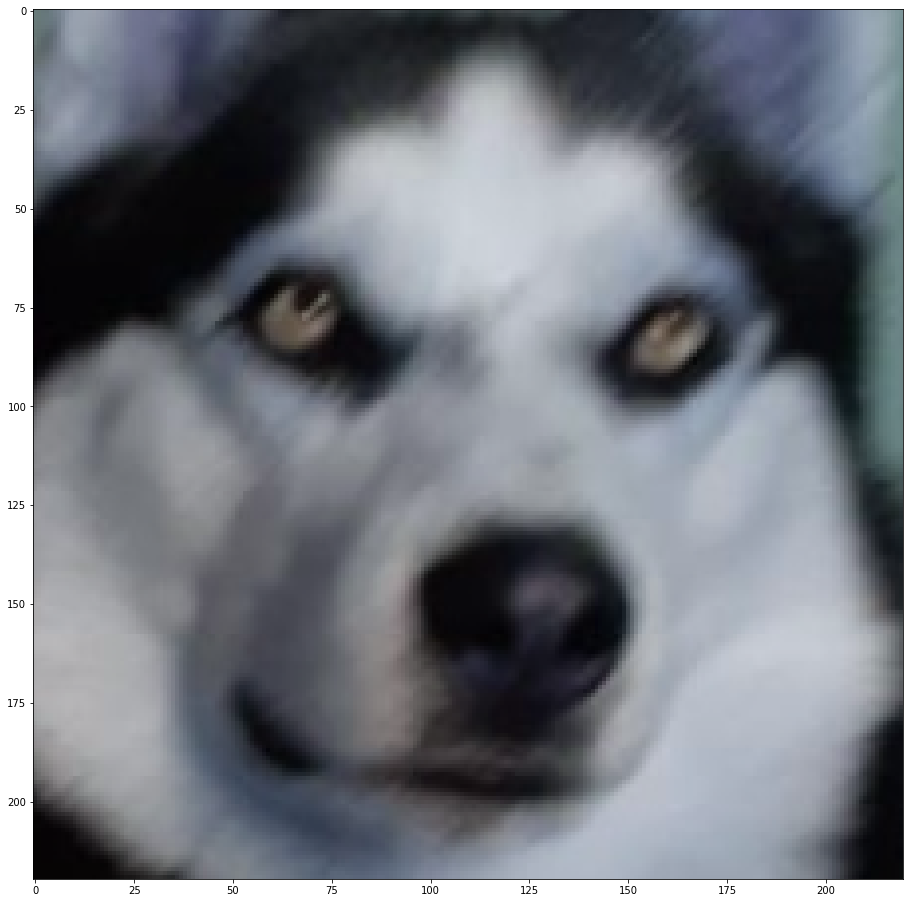

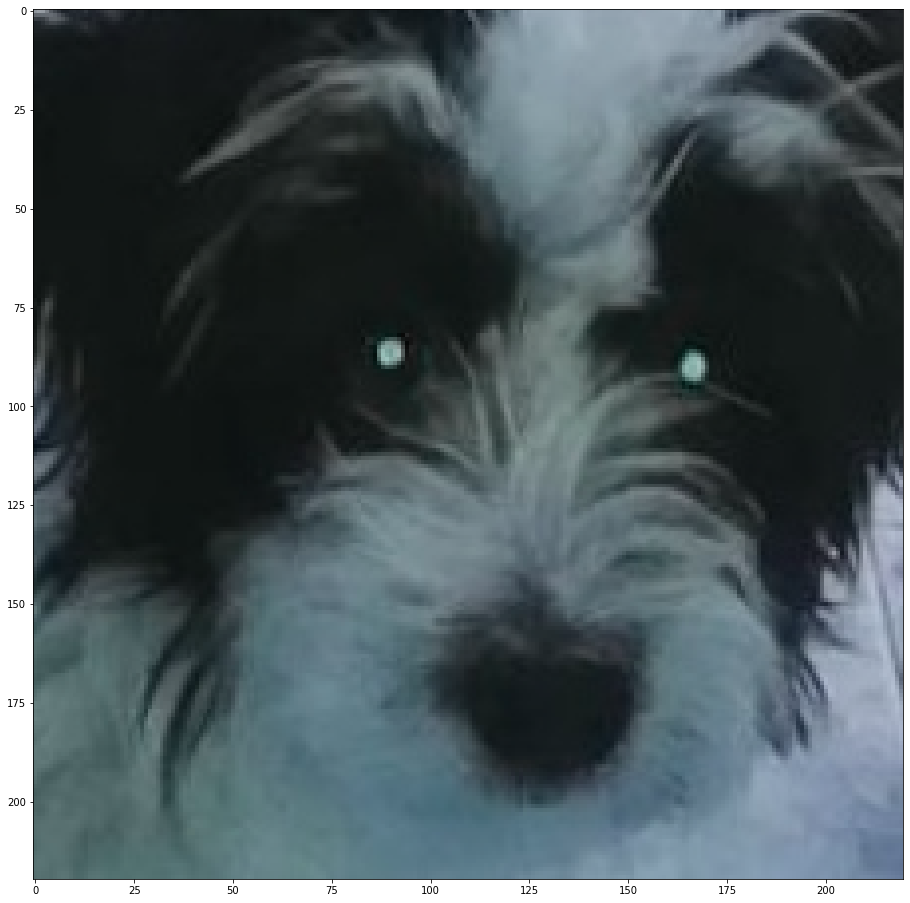

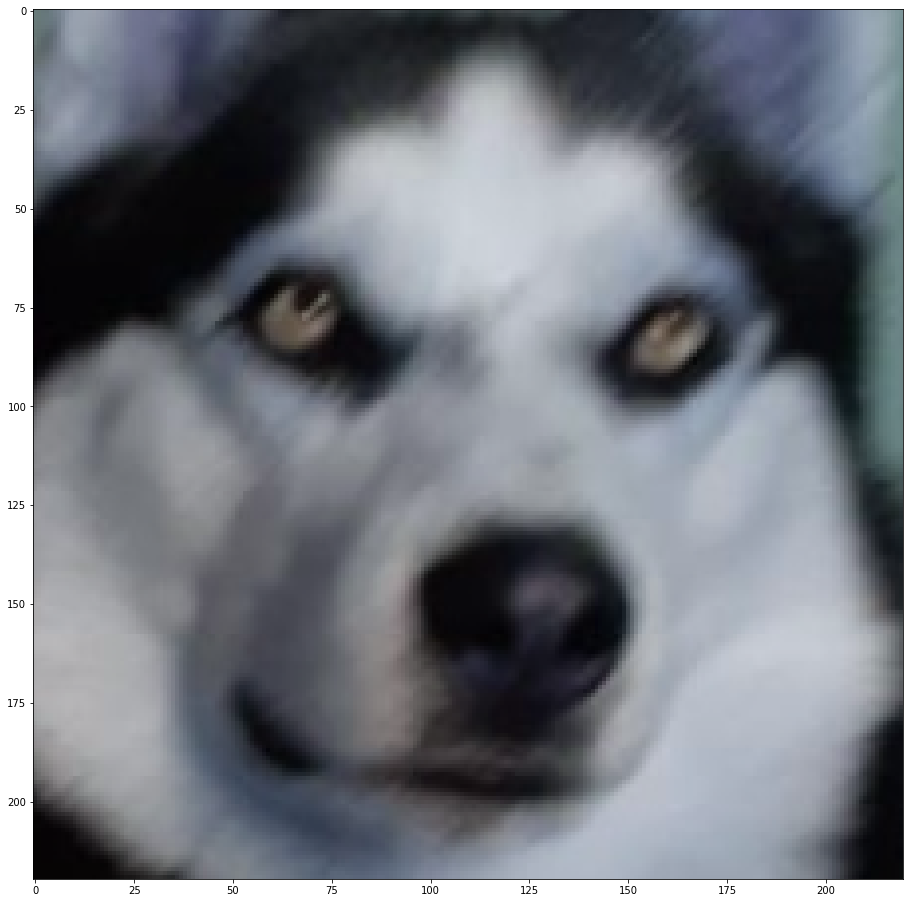

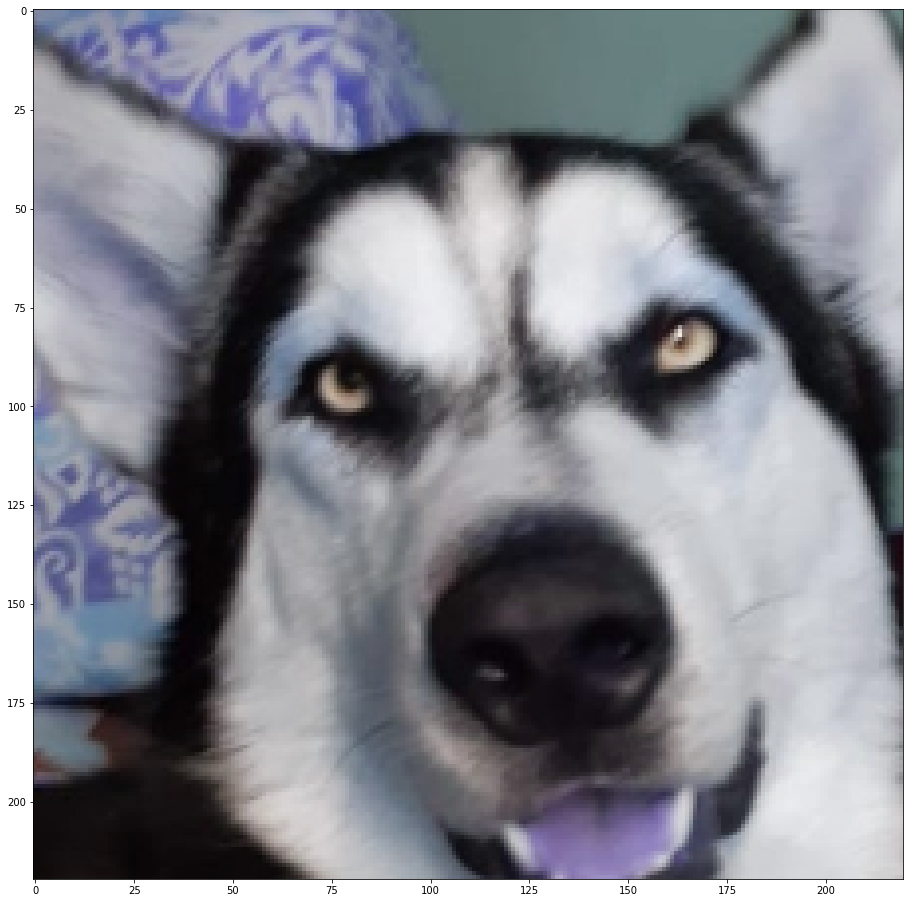

In [34]:
path_cortadas='/media/dataset_cortadas' #4
path_redimensionadas='/media/dataset_redimensionadas' #5

#leer imagenes del directorio
files_cortadas = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path_cortadas):
        for file in f:
          if '.jpg' in file:
              files_cortadas.append(os.path.join(r, file))
print(files_cortadas)   

nombrei=0
for imgi in files_cortadas:
  nombrei=nombrei+1
  #Abrir Imagen (Lee la imagen en formtado BGR)
  imgBGR = cv2.imread(imgi)

  #Cambiar el tamaño resize
  height = 220
  width = 220
  dim = (width, height)
  img_redim = cv2.resize(imgBGR, dim, interpolation=cv2.INTER_LINEAR)
  filename=(path_redimensionadas+'/'+str(nombrei)+'.jpg') 
  #print(filename)
  cv2.imwrite(filename, img_redim)

  plt.figure(figsize=(16, 16))
  plt.imshow(img_redim)

  